In [258]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import seaborn as sns;
df = pd.read_csv("vgsales.csv")

In [259]:
df.dropna(how = "any",inplace = True)



# Sucesso de jogos nas plataformas

In [260]:
df=df.assign(lancamentos = 1)

In [261]:
print("Quantidade de títulos: "+
    str(df["Name"].shape[0])+
      "\nQuantidade de nomes únicos: "+
    str(df["Name"].unique().shape[0])
     )

Quantidade de títulos: 16291
Quantidade de nomes únicos: 11325


(array([1485., 4669., 3152., 1151., 2930., 1526.,  712.,  635.,   24.,
           7.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

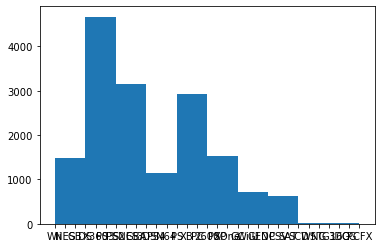

In [262]:
plt.hist(df["Platform"])

In [263]:
Global_S = df["Global_Sales"]
Global_S.max()

82.74

In [264]:
df.loc[Global_S > 80]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,lancamentos
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1


In [265]:
df.loc[Global_S > 40]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,lancamentos
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1


In [266]:
df.loc[Global_S > 10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,lancamentos
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,1
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,1
59,60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42,1
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26,1


(array([13.,  6., 10.,  9.,  7.,  7.,  2.,  4.,  2.,  2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

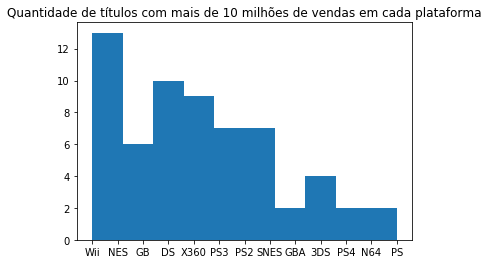

In [267]:
plt.title("Quantidade de títulos com mais de 10 milhões de vendas em cada plataforma")
plt.hist(df.loc[Global_S > 10]["Platform"])

(array([1388.,   97., 2131., 1234., 1304., 2366.,  786.,  499.,  336.,
        1505.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

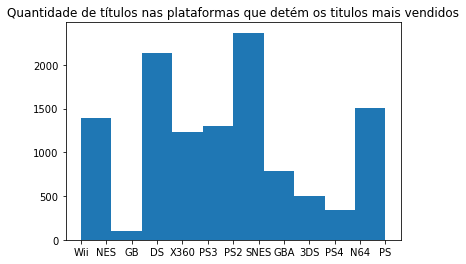

In [268]:
plt.title("Quantidade de títulos nas plataformas que detém os titulos mais vendidos")
plt.hist(df["Platform"].loc[df["Platform"].isin(list(df.loc[Global_S > 10]["Platform"].unique()))])


(array([51., 10.,  9., 10.,  6.,  3.,  2.,  1.,  0.,  1.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

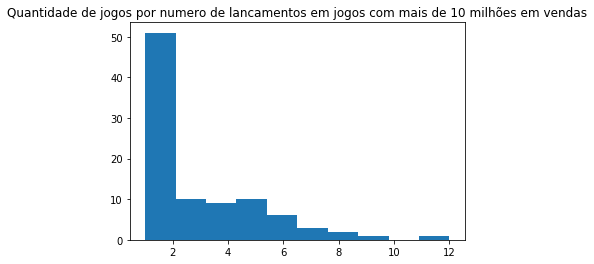

In [269]:
df_jogos = df.groupby(["Name"]).sum().sort_values('Global_Sales',ascending=False)[["Global_Sales","lancamentos"]]
top_jogos = df_jogos.loc[df_jogos["Global_Sales"]>10]
plt.title("Quantidade de jogos por numero de lancamentos em jogos com mais de 10 milhões em vendas")
plt.hist(top_jogos["lancamentos"])

A maioria dos jogos com mais de 10 milhões de vendas possuem apenas um único lançamento, então não são multiplataformas

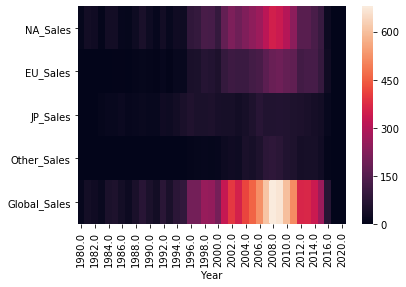

In [270]:
df_top_jogos = df.loc[df["Name"].isin(top_jogos.index)]
#df_top_jogos.groupby(["Platform"]).pivot(index="Platform",columns='Year', values='Global_Sales')
sns.heatmap(df.groupby(["Year"]).sum()[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].T)

(array([9., 5., 9., 1., 2., 2., 2., 4., 1., 2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

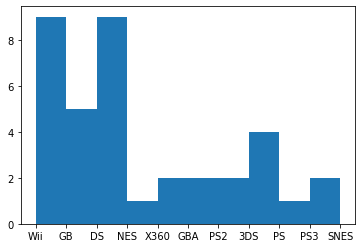

In [271]:
jogos_sucesso_plataforma_unica = list(top_jogos.loc[top_jogos["lancamentos"]==1].index)

plt.hist(df.loc[df["Name"].isin(jogos_sucesso_plataforma_unica)]["Platform"])


É possível perceber com as análises que a maioria dos jogos de sucesso não são aqueles disponíveis em varias plataformas, mas aqueles que são ofertados principalmente nos consoles da Nintendo, isso mostra que um jogo tende a obter muito mais vendas caso seja um jogo voltado à família, mesmo que exclusivamente em um console, e não aqueles jogos que são disponibilizados em diversos consoles.